Import of libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,save_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [3]:
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random

In [4]:
import dask.bag as db
from dask.diagnostics import ProgressBar
from PIL import Image

In [5]:
from keras import regularizers
import pickle
import joblib
import uvicorn
from fastapi import FastAPI

Getting the working directory

In [6]:
os.getcwd()

'C:\\Users\\devel\\OneDrive\\Documents\\Notes\\SEM-2\\AI-and-ML-Lab-2404\\Project'

In [6]:
image_dir='C:\\Users\\devel\\OneDrive\\Documents\\Notes\\SEM-2\\AI-and-ML-Lab-2404\\Project\\Images-Set\\Gesture Image Data'

Getting the image folders

In [7]:
os.listdir(image_dir)

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '_']

In [8]:
img_dir_names=os.listdir(image_dir)

In [9]:
print(img_dir_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_']


In [10]:
no_of_dir=list(range(len(img_dir_names)))

In [11]:
print(no_of_dir)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


Mapping of directories  and converting to dictionaries using zip function

In [12]:
direct_map=dict(zip(img_dir_names,no_of_dir)) 

In [13]:
print(direct_map)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, '_': 36}


Reverse map for model validation

In [14]:
rev_map=dict(zip(no_of_dir,img_dir_names)) 

In [15]:
print(rev_map)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: '_'}


In [16]:
A_img_path='C:\\Users\\devel\\OneDrive\\Documents\\Notes\\SEM-2\\AI-and-ML-Lab-2404\\Project\\Images-Set\\Gesture Image Data\\A\\18.jpg'

Reading image using cv2

In [17]:
sample_image=cv2.imread(A_img_path)

In [18]:
print(sample_image.shape)

(50, 50, 3)


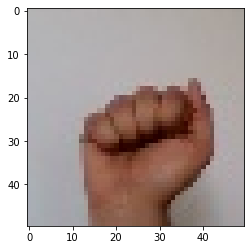

In [19]:
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))

Storing the images and directory images in variables

In [20]:
img_data=[]

In [21]:
img_name=[]

In [22]:
count=0

In [23]:
for dataname in tqdm(os.listdir(image_dir)):
    img_path=os.path.join(image_dir,dataname)
    for myimage in os.listdir(img_path):
        image=cv2.imread(os.path.join(img_path,myimage))
        img_data+=[image]
        img_name+=[count]
    count=count+1

100%|██████████| 37/37 [11:17<00:00, 18.32s/it]


In [ ]:
type(img_data)

In [ ]:
print(count)

In [24]:
imdata=np.array(img_data)

In [ ]:
imdata.shape

In [25]:
imname=np.array(img_name)

In [ ]:
print(pd.Series(imname).value_counts())

EDA for Images

In [ ]:
direct_map

In [ ]:
plt.bar(direct_map.keys(),pd.Series(imname).value_counts(),width=0.8)
plt.title("Number of Images by signs")
plt.xlabel('Sign Name')
plt.ylabel('No:of Images')

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(12,12))
colors = ['red', 'green', 'blue']
for i, ax in enumerate(axes):
    ax.imshow(imdata[0][:,:,i], cmap='gray')
    ax.set_title(colors[i]+' channel'), ax.axis('off')
plt.show()

In [ ]:
im_ob_chnl=[]

In [ ]:
for i in range(0,len(imdata)):
    a=imdata[i]
    im_ob_chnl.append(a)

In [ ]:
import seaborn as sns

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(18,6))
for i, ax in enumerate(axes):
    df = im_ob_chnl[i].ravel()
    sns.histplot(df, bins=np.arange(0,255), ax=ax)
    ax.set_title(colors[i]+' channel')
plt.show()

In [ ]:
std_dev_obj = []
fig, axes = plt.subplots(2,3, figsize=(18,6))
for i, ax in enumerate(axes.flat):
    img_matrix = imdata[i].ravel()
    std_dev = np.std(img_matrix)
    std_dev_obj.append(std_dev)
    sns.histplot(img_matrix, bins=np.arange(0,1, 0.01), ax=ax)
    ax.text(0.05,0.85, f'std dev: {std_dev:.2f}', size=15, transform = ax.transAxes)
    ax.set_title(f'img {i}') 
plt.suptitle('Histograms for images')
plt.tight_layout()
plt.show()

Model Creation

In [26]:
len_im=len(imdata)


In [27]:
len_im

55500

In [28]:
range_len_im=list(range(len_im))

In [29]:
random.seed(2021)
random.shuffle(range_len_im)

In [30]:
X0=imdata[range_len_im[0:(len_im//4)*3]]

In [42]:
X0

array([[[[168, 169, 167],
         [168, 169, 167],
         [168, 169, 167],
         ...,
         [171, 173, 184],
         [170, 173, 181],
         [169, 173, 178]],

        [[168, 169, 167],
         [168, 169, 167],
         [169, 170, 168],
         ...,
         [170, 172, 183],
         [169, 172, 180],
         [169, 173, 178]],

        [[169, 170, 168],
         [169, 170, 168],
         [169, 169, 169],
         ...,
         [168, 173, 182],
         [170, 173, 181],
         [170, 174, 179]],

        ...,

        [[171, 166, 163],
         [171, 166, 163],
         [172, 167, 164],
         ...,
         [186, 184, 184],
         [185, 183, 183],
         [185, 183, 183]],

        [[168, 164, 163],
         [170, 166, 165],
         [172, 169, 165],
         ...,
         [187, 182, 183],
         [187, 182, 183],
         [186, 181, 182]],

        [[167, 165, 164],
         [168, 166, 165],
         [171, 168, 164],
         ...,
         [185, 180, 181],
        

In [31]:
Y0=imname[range_len_im[0:(len_im//4)*3]]

In [32]:
Y0.shape

(41625,)

In [33]:
X1=imdata[range_len_im[(len_im//4)*3:]]

In [34]:
Y1=imname[range_len_im[(len_im//4)*3:]]

In [35]:
Y1.shape

(13875,)

In [36]:
my_labels=to_categorical(Y0)

In [41]:
my_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
trainY=np.array(my_labels)

In [38]:
trainY.shape

(41625, 37)

In [39]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X0,trainY,test_size=0.2,random_state=44)

In [40]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(33300, 50, 50, 3)
(8325, 50, 50, 3)
(33300, 37)
(8325, 37)


In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
CNN_model = tf.keras.applications.DenseNet201(input_shape=(50,50,3),include_top=False,weights='imagenet',pooling='avg')
CNN_model.trainable = False

In [ ]:
img_inputs = CNN_model.input

In [ ]:
x = tf.keras.layers.Dense(128, activation='relu')(CNN_model.output)

In [ ]:
img_output = tf.keras.layers.Dense(len(img_dir_names), activation='softmax')(x)

In [ ]:
new_model = tf.keras.Model(inputs=img_inputs, outputs=img_output)

In [ ]:
#new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#new_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
new_model.summary()

In [62]:
fit_model=new_model.fit(datagen.flow(X_Train,Y_Train,batch_size=32),validation_data=(X_Test,Y_Test),epochs=20)

Epoch 1/20
1041/1041 [==============================] - 353s 323ms/step - loss: 1.0620 - accuracy: 0.6686 - val_loss: 0.4461 - val_accuracy: 0.8413
Epoch 2/20
1041/1041 [==============================] - 326s 313ms/step - loss: 0.5263 - accuracy: 0.8226 - val_loss: 0.3679 - val_accuracy: 0.8759
Epoch 3/20
1041/1041 [==============================] - 356s 342ms/step - loss: 0.4271 - accuracy: 0.8522 - val_loss: 0.3367 - val_accuracy: 0.8908
Epoch 4/20
1041/1041 [==============================] - 331s 318ms/step - loss: 0.3758 - accuracy: 0.8710 - val_loss: 0.3801 - val_accuracy: 0.8769
Epoch 5/20
1041/1041 [==============================] - 388s 373ms/step - loss: 0.3489 - accuracy: 0.8803 - val_loss: 0.3921 - val_accuracy: 0.8752
Epoch 6/20
1041/1041 [==============================] - 404s 388ms/step - loss: 0.3390 - accuracy: 0.8850 - val_loss: 0.3689 - val_accuracy: 0.8652
Epoch 7/20
1041/1041 [==============================] - 382s 367ms/step - loss: 0.3143 - accuracy: 0.8913 - val_

In [63]:
y_pred=new_model.predict(X_Test)

In [84]:
y_pred

array([[3.38207881e-17, 3.72117975e-10, 1.11892535e-11, ...,
        1.41396859e-11, 2.99955102e-14, 1.11410921e-13],
       [2.43797598e-27, 7.15874503e-14, 6.47908524e-16, ...,
        5.32032372e-14, 5.29546485e-23, 4.47472497e-20],
       [1.58023589e-15, 3.89869413e-17, 2.88497887e-16, ...,
        2.97828515e-12, 1.82638329e-16, 2.41743896e-19],
       ...,
       [3.26063998e-09, 1.19462316e-08, 9.35958559e-13, ...,
        5.18308127e-07, 4.22574059e-10, 9.98217642e-01],
       [2.40935229e-13, 3.99250213e-13, 1.93374093e-12, ...,
        6.38276703e-08, 1.50525009e-11, 1.35627320e-09],
       [4.86082986e-15, 2.30941034e-15, 2.02324136e-14, ...,
        8.20061727e-12, 5.98437353e-16, 3.62798563e-18]], dtype=float32)

In [64]:
pred=np.argmax(y_pred,axis=1)

In [65]:
ground = np.argmax(Y_Test,axis=1)

In [66]:
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       225
           1       1.00      1.00      1.00       237
           2       1.00      0.94      0.97       238
           3       0.97      0.99      0.98       231
           4       0.93      0.91      0.92       217
           5       1.00      1.00      1.00       217
           6       1.00      0.28      0.43       232
           7       0.34      0.12      0.17       234
           8       0.42      1.00      0.59       240
           9       0.93      0.97      0.95       205
          10       1.00      0.98      0.99       216
          11       1.00      1.00      1.00       236
          12       1.00      0.83      0.91       207
          13       0.97      0.88      0.93       191
          14       1.00      1.00      1.00       239
          15       0.98      0.53      0.69       227
          16       0.97      0.44      0.61       236
          17       0.94    

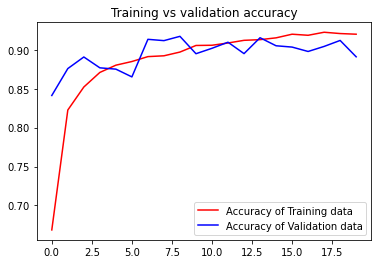

<Figure size 432x288 with 0 Axes>

In [67]:
get_acc = fit_model.history['accuracy']
value_acc = fit_model.history['val_accuracy']
get_loss = fit_model.history['loss']
validation_loss = fit_model.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

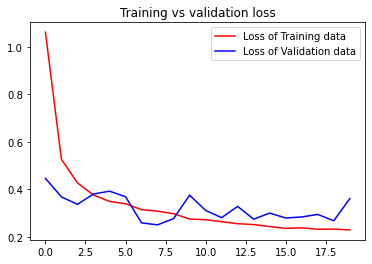

<Figure size 432x288 with 0 Axes>

In [68]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [69]:
pred_2=new_model.predict(X1)
print(pred_2.shape)

(13875, 37)


In [70]:
predicted=[]
for item in pred_2:
    value2=np.argmax(item)      
    predicted+=[value2]

In [71]:
print(pd.Series(predicted).value_counts())

8     956
25    609
18    498
30    469
19    443
32    425
20    424
26    413
23    405
4     398
11    394
5     393
9     391
10    389
21    384
24    382
29    377
28    373
34    372
36    369
22    360
17    358
3     353
14    352
2     352
1     347
33    345
13    340
0     329
27    327
31    326
35    299
12    295
15    232
16    182
7     134
6      80
dtype: int64


In [72]:
ANS = Y1
print(pd.Series(ANS).value_counts())
accuracy=accuracy_score(ANS,predicted)
print(accuracy)

32    404
17    396
5     395
4     395
11    394
23    394
6     394
10    392
21    390
8     389
26    386
30    383
18    383
20    382
33    382
7     382
2     380
15    379
35    378
28    376
34    371
9     370
12    370
24    369
25    368
36    366
27    366
19    365
16    364
13    363
22    356
14    354
29    354
1     348
31    347
3     345
0     345
dtype: int64
0.8892252252252252


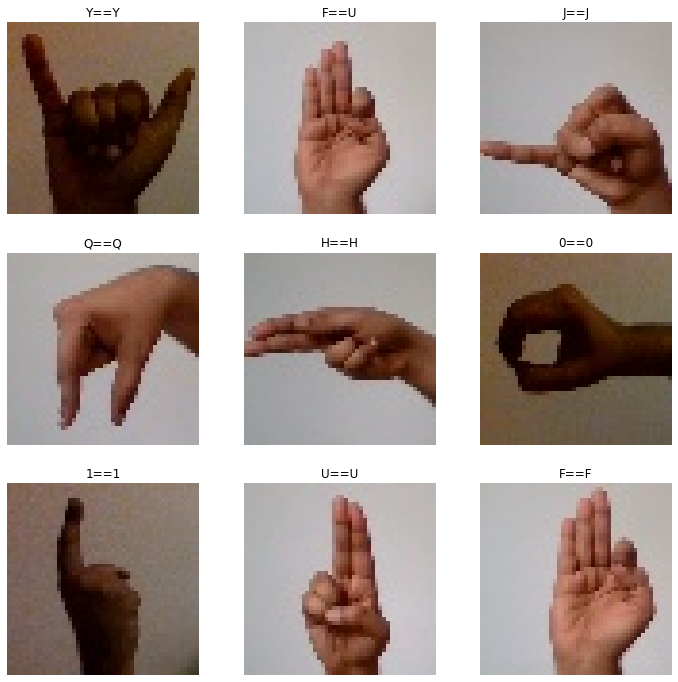

In [73]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
for i in range(9):
    r=i//3
    c=i%3
    img1 = X1[i]
    ax=axs[r][c].axis("off")
    actual=rev_map[Y1[i]]
    predict=rev_map[predicted[i]]    
    ax=axs[r][c].set_title(actual+'=='+predict)
    ax=axs[r][c].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

# Saving the model to the local directory

In [74]:
file_name='C:\\Users\\devel\\OneDrive\\Documents\\Notes\\SEM-2\\AI-and-ML-Lab-2404\\Project\\trained_Sign_languages.pkl'

In [80]:
new_model.save("C:\\Users\\devel\\OneDrive\\Documents\\Notes\\SEM-2\\AI-and-ML-Lab-2404\\Project\\model.h5")

In [81]:
k_model = tf.keras.models.load_model('C:\\Users\\devel\\OneDrive\\Documents\\Notes\\SEM-2\\AI-and-ML-Lab-2404\\Project\\model.h5')

In [82]:
new_pred=k_model.predict(X_Test)

In [83]:
new_pred

array([[3.38207881e-17, 3.72117975e-10, 1.11892535e-11, ...,
        1.41396859e-11, 2.99955102e-14, 1.11410921e-13],
       [2.43797598e-27, 7.15874503e-14, 6.47908524e-16, ...,
        5.32032372e-14, 5.29546485e-23, 4.47472497e-20],
       [1.58023589e-15, 3.89869413e-17, 2.88497887e-16, ...,
        2.97828515e-12, 1.82638329e-16, 2.41743896e-19],
       ...,
       [3.26063998e-09, 1.19462316e-08, 9.35958559e-13, ...,
        5.18308127e-07, 4.22574059e-10, 9.98217642e-01],
       [2.40935229e-13, 3.99250213e-13, 1.93374093e-12, ...,
        6.38276703e-08, 1.50525009e-11, 1.35627320e-09],
       [4.86082986e-15, 2.30941034e-15, 2.02324136e-14, ...,
        8.20061727e-12, 5.98437353e-16, 3.62798563e-18]], dtype=float32)

# FASTAPI /FLASK API

In [85]:
pip install fastapi

In [86]:
pip install uvicorn

### Initializing a FastAPI App Instance

In [88]:
app = FastAPI(
    title="Sign Language Model API",
    description="An API which uses NLP model to predict the real time sign language",
    version="0.1",
)

### Create Prediction Endpoint

In [89]:
@app.get("/predict-sign")

SyntaxError: unexpected EOF while parsing (1052132422.py, line 1)

Optimising the model

In [ ]:
categories=trainY.shape[1]

In [ ]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X0,trainY,test_size=0.25,random_state=0)

In [ ]:
print(X_Train.shape, X_Test.shape)
print(Y_Train.shape, Y_Test.shape)

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu',input_shape=(50,50 ,3) ))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(categories, activation = 'softmax'))

model.summary()

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
fit_model=model.fit(datagen.flow(X_Train,Y_Train,batch_size=138),validation_data=(X_Test,Y_Test),epochs=20)

In [ ]:
y_pred=model.predict(X_Test)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(Y_Test,axis=1)
print(classification_report(ground,pred))

In [ ]:
get_acc = fit_model.history['accuracy']
value_acc = fit_model.history['val_accuracy']
get_loss = fit_model.history['loss']
validation_loss = fit_model.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
pred_2=model.predict(X1)
print(pred_2.shape)

predicted=[]
for item in pred_2:
    value2=np.argmax(item)      
    predicted+=[value2]

In [ ]:
ANS = Y1
print(pd.Series(ANS).value_counts())
accuracy=accuracy_score(ANS,predicted)
print(accuracy)

## VGG-16 Implementation

In [46]:
import os
from keras.models import Model
from tensorflow.keras.optimizers import Adam 
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

In [47]:
BATCH_SIZE = 64

train_generator = ImageDataGenerator(rotation_range=90, 
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5, 
                                     height_shift_range=0.5,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     validation_split=0.15,
                                     preprocessing_function=preprocess_input) # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing

In [49]:
traingen = train_generator.flow_from_directory(X0,
                                               target_size=(50, 50),
                                               class_mode='categorical',
                                               #classes=class_subset,
                                               subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=42)


ValueError: listdir: embedded null character in path